In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN



cust = pd.read_csv('custody_ML.csv')
shoot = pd.read_csv('shootings_ML.csv')

C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
cust.head()

,Unnamed: 0,custody_type,race,death_type,age
0,0,2,4,5,58.0
1,1,2,3,5,76.0
2,2,1,4,6,30.0
3,3,2,1,1,39.0
4,4,2,1,5,31.0


In [4]:
shoot.head()

,Unnamed: 0,age,fatality,armed,race,mult_officers
0,103,26.0,0,2,4,0
1,104,16.0,0,2,2,0
2,105,26.0,0,2,0,1
3,106,35.0,0,0,4,0
4,107,30.0,0,2,2,0


In [2]:
cust.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
shoot.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#Scale cust df
X_col = cust.columns

cust_scaled = pd.DataFrame(StandardScaler().fit_transform(cust), columns= X_col)
cust_scaled.head()

,custody_type,race,death_type,age
0,0.123491,1.156565,0.155584,0.590814
1,0.123491,0.406515,0.155584,1.798521
2,-1.037655,1.156565,0.943599,-1.287842
3,0.123491,-1.093584,-2.996475,-0.683988
4,0.123491,-1.093584,0.155584,-1.220747


In [5]:
#Scale shoot df
X_cols = shoot.columns

shoot_scaled = pd.DataFrame(StandardScaler().fit_transform(shoot), columns = X_cols)
shoot_scaled.head()

,age,fatality,armed,race,mult_officers
0,-0.670348,-1.387608,0.980761,1.548471,-0.591786
1,-1.716530,-1.387608,0.980761,-0.096378,-0.591786
2,-0.670348,-1.387608,0.980761,-1.741227,1.689799
3,0.271215,-1.387608,-1.040776,1.548471,-0.591786
4,-0.251876,-1.387608,0.980761,-0.096378,-0.591786


# Deaths in Custody

## KMeans Clustering

In [8]:
#KMeans Clustering of Custody data
k_range = range(2,11)

for i in k_range:
    model = KMeans(n_clusters=i,random_state=11)
    pred =model.fit_predict(cust_scaled)
    silhouette_avg = silhouette_score(cust_scaled,pred)
    print('The number of clusters, %d, and silhouette coefficient is %0.2f'% (i,silhouette_avg))

The number of clusters, 2, and silhouette coefficient is 0.38
The number of clusters, 3, and silhouette coefficient is 0.35
The number of clusters, 4, and silhouette coefficient is 0.40
The number of clusters, 5, and silhouette coefficient is 0.41
The number of clusters, 6, and silhouette coefficient is 0.43
The number of clusters, 7, and silhouette coefficient is 0.44
The number of clusters, 8, and silhouette coefficient is 0.39
The number of clusters, 9, and silhouette coefficient is 0.40
The number of clusters, 10, and silhouette coefficient is 0.40


## Affinity Propagation

In [31]:
# Affinity propagation with default parameters
affPro = AffinityPropagation()
affPro.fit_predict(cust_scaled)
labels = affPro.labels_
print("Silhouette Coefficient: %0.3f"% silhouette_score(cust_scaled, labels, metric='euclidean'))

Silhouette Coefficient: nan


C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


#### Tuning

In [64]:
damp = [0.95, 0.85, 0.75, 0.5]
conv = [7, 15, 23]

for d in damp:
    for c in conv:
        affPro = AffinityPropagation(damping= d, convergence_iter= c)
        affPro.fit_predict(cust_scaled)
        labels = affPro.labels_
        print("damping = ", d, "convergence_iter = ",c)
        print("Silhouette Coefficient: %0.3f"% silhouette_score(cust_scaled, labels, metric='euclidean'))

damping =  0.95 convergence_iter =  7


C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


Silhouette Coefficient: nan
damping =  0.95 convergence_iter =  15
Silhouette Coefficient: nan
damping =  0.95 convergence_iter =  23
Silhouette Coefficient: nan
damping =  0.85 convergence_iter =  7
Silhouette Coefficient: nan
damping =  0.85 convergence_iter =  15
Silhouette Coefficient: nan
damping =  0.85 convergence_iter =  23
Silhouette Coefficient: nan
damping =  0.75 convergence_iter =  7
Silhouette Coefficient: nan
damping =  0.75 convergence_iter =  15
Silhouette Coefficient: nan
damping =  0.75 convergence_iter =  23
Silhouette Coefficient: nan
damping =  0.5 convergence_iter =  7
Silhouette Coefficient: nan
damping =  0.5 convergence_iter =  15
Silhouette Coefficient: nan
damping =  0.5 convergence_iter =  23
Silhouette Coefficient: nan


## Spectral Clustering

In [30]:
# Spectral clustering
for k in range(2,11):
    spect = SpectralClustering(n_clusters=k,random_state=11)
    spect.fit_predict(cust_scaled)
    spectlabel = spect.labels_
    score= silhouette_score(cust_scaled, spectlabel, metric='euclidean')
    print("The number of clusters: %d, silhouette coefficient: %0.2f" % (k,score))

The number of clusters: 2, silhouette coefficient: 0.20
The number of clusters: 3, silhouette coefficient: 0.27
The number of clusters: 4, silhouette coefficient: 0.29
The number of clusters: 5, silhouette coefficient: 0.13
The number of clusters: 6, silhouette coefficient: 0.25
The number of clusters: 7, silhouette coefficient: 0.26
The number of clusters: 8, silhouette coefficient: 0.29
The number of clusters: 9, silhouette coefficient: 0.22
The number of clusters: 10, silhouette coefficient: 0.23


#### Tuning

In [21]:
gam = [0.001, 0.01, 0.1, 0.25, 0.5, 1.0]

for g in gam:
    for k in range(2,11):
        spect = SpectralClustering(n_clusters=k, random_state=11, n_jobs =-1, gamma= g)
        spect.fit_predict(cust_scaled)
        spectlabel = spect.labels_
        score= silhouette_score(cust_scaled, spectlabel, metric='euclidean')
        print("The number of clusters: %d, gamma: %f, silhouette coefficient: %0.2f" % (k,g,score))

The number of clusters: 2, gamma: 0.001000, silhouette coefficient: 0.36
The number of clusters: 3, gamma: 0.001000, silhouette coefficient: 0.29
The number of clusters: 4, gamma: 0.001000, silhouette coefficient: 0.37
The number of clusters: 5, gamma: 0.001000, silhouette coefficient: 0.41
The number of clusters: 6, gamma: 0.001000, silhouette coefficient: 0.40
The number of clusters: 7, gamma: 0.001000, silhouette coefficient: 0.43
The number of clusters: 8, gamma: 0.001000, silhouette coefficient: 0.45
The number of clusters: 9, gamma: 0.001000, silhouette coefficient: 0.37
The number of clusters: 10, gamma: 0.001000, silhouette coefficient: 0.34
The number of clusters: 2, gamma: 0.010000, silhouette coefficient: 0.36
The number of clusters: 3, gamma: 0.010000, silhouette coefficient: 0.29
The number of clusters: 4, gamma: 0.010000, silhouette coefficient: 0.37
The number of clusters: 5, gamma: 0.010000, silhouette coefficient: 0.41
The number of clusters: 6, gamma: 0.010000, silhou

## Agglomerative

In [35]:
# Agglomerative Clustering with 2-10 clusters 
for k in range(2,11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit_predict(cust_scaled)
    labels = agg.labels_
    score= silhouette_score(cust_scaled, labels, metric='euclidean')
    print("The number of clusters: %d, silhouette coefficient: %0.2f" % (k,score))

The number of clusters: 2, silhouette coefficient: 0.38
The number of clusters: 3, silhouette coefficient: 0.39
The number of clusters: 4, silhouette coefficient: 0.40
The number of clusters: 5, silhouette coefficient: 0.36
The number of clusters: 6, silhouette coefficient: 0.38
The number of clusters: 7, silhouette coefficient: 0.36
The number of clusters: 8, silhouette coefficient: 0.38
The number of clusters: 9, silhouette coefficient: 0.39
The number of clusters: 10, silhouette coefficient: 0.39


## DBScan

In [36]:
db = DBSCAN()
db.fit_predict(cust_scaled)
labels = db.labels_
score= silhouette_score(cust_scaled, labels, metric='euclidean')
print("Silhouette Coefficient: %0.3f"% silhouette_score(cust_scaled, labels, metric='euclidean'))

Silhouette Coefficient: 0.204


#### Tuning

In [6]:
ep = [0.25, 0.5, 0.75, 1, 1.5] #only clustered into one group at 2
minsamp = [3, 4, 5, 6]

for e in ep:
    for m in minsamp:
        db = DBSCAN(eps=e, min_samples=m, n_jobs=-1)
        db.fit_predict(cust_scaled)
        labels = db.labels_
        print("eps = ", e, "min_samples = ", m)
        print("Silhouette Coefficient: %0.3f"% silhouette_score(cust_scaled, labels, metric='euclidean'))

eps =  0.25 min_samples =  3
Silhouette Coefficient: 0.085
eps =  0.25 min_samples =  4
Silhouette Coefficient: 0.102
eps =  0.25 min_samples =  5
Silhouette Coefficient: 0.116
eps =  0.25 min_samples =  6
Silhouette Coefficient: 0.202
eps =  0.5 min_samples =  3
Silhouette Coefficient: 0.187
eps =  0.5 min_samples =  4
Silhouette Coefficient: 0.237
eps =  0.5 min_samples =  5
Silhouette Coefficient: 0.204
eps =  0.5 min_samples =  6
Silhouette Coefficient: 0.135
eps =  0.75 min_samples =  3
Silhouette Coefficient: 0.222
eps =  0.75 min_samples =  4
Silhouette Coefficient: 0.256
eps =  0.75 min_samples =  5
Silhouette Coefficient: 0.255
eps =  0.75 min_samples =  6
Silhouette Coefficient: 0.257
eps =  1 min_samples =  3
Silhouette Coefficient: 0.225
eps =  1 min_samples =  4
Silhouette Coefficient: 0.225
eps =  1 min_samples =  5
Silhouette Coefficient: 0.225
eps =  1 min_samples =  6
Silhouette Coefficient: 0.237
eps =  1.5 min_samples =  3
Silhouette Coefficient: 0.307
eps =  1.5 min

# Officer Involved Shootings

## Kmeans 

In [16]:
#KMeans Clustering of Custody data
k_range = range(2,11)

for i in k_range:
    model = KMeans(n_clusters=i,random_state=11)
    pred =model.fit_predict(shoot_scaled)
    silhouette_avg = silhouette_score(shoot_scaled,pred)
    print('The number of clusters, %d, and silhouette coefficient is %0.2f'% (i,silhouette_avg))

The number of clusters, 2, and silhouette coefficient is 0.27
The number of clusters, 3, and silhouette coefficient is 0.26
The number of clusters, 4, and silhouette coefficient is 0.27
The number of clusters, 5, and silhouette coefficient is 0.30
The number of clusters, 6, and silhouette coefficient is 0.33
The number of clusters, 7, and silhouette coefficient is 0.33
The number of clusters, 8, and silhouette coefficient is 0.35
The number of clusters, 9, and silhouette coefficient is 0.38
The number of clusters, 10, and silhouette coefficient is 0.38


## Affinity Propagation

In [7]:
# Affinity propagation with default parameters
affPro = AffinityPropagation()
affPro.fit_predict(shoot_scaled)
centers = affPro.cluster_centers_indices_
labels = affPro.labels_
print("Silhouette Coefficient: %0.3f"% silhouette_score(shoot_scaled, labels, metric='euclidean'))

Silhouette Coefficient: nan


C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


#### Tuning 

In [8]:
damp = [0.5, 0.6,0.7, 0.8, 0.9]
conv = [7, 15, 23, 50, 75]

for d in damp:
    for c in conv:
        affPro = AffinityPropagation(damping= d, convergence_iter= c)
        affPro.fit_predict(shoot_scaled)
        centers = affPro.cluster_centers_indices_ 
        labels = affPro.labels_
        print("damping = ", d, "convergence_iter = ",c)
        print("Silhouette Coefficient: %0.3f"% silhouette_score(shoot_scaled, labels, metric='euclidean'))

damping =  0.5 convergence_iter =  7
Silhouette Coefficient: nan


C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


damping =  0.5 convergence_iter =  15
Silhouette Coefficient: nan
damping =  0.5 convergence_iter =  23
Silhouette Coefficient: nan
damping =  0.5 convergence_iter =  50
Silhouette Coefficient: nan
damping =  0.5 convergence_iter =  75
Silhouette Coefficient: nan
damping =  0.6 convergence_iter =  7
Silhouette Coefficient: 0.443
damping =  0.6 convergence_iter =  15
Silhouette Coefficient: 0.443
damping =  0.6 convergence_iter =  23
Silhouette Coefficient: 0.443
damping =  0.6 convergence_iter =  50
Silhouette Coefficient: 0.443
damping =  0.6 convergence_iter =  75
Silhouette Coefficient: 0.443
damping =  0.7 convergence_iter =  7
Silhouette Coefficient: 0.531
damping =  0.7 convergence_iter =  15
Silhouette Coefficient: 0.531
damping =  0.7 convergence_iter =  23
Silhouette Coefficient: 0.531
damping =  0.7 convergence_iter =  50
Silhouette Coefficient: 0.531
damping =  0.7 convergence_iter =  75
Silhouette Coefficient: 0.531
damping =  0.8 convergence_iter =  7
Silhouette Coefficien

## Spectral Clustering

In [10]:
# Spectral clustering of Shooting data

for k in range(2,11):
    spect = SpectralClustering(n_clusters=k,random_state=11)
    spect.fit_predict(shoot_scaled)
    spectlabel = spect.labels_
    score=silhouette_score(shoot_scaled, spectlabel, metric='euclidean')
    print("The number of clusters, %d, and silhouette coefficient is %0.2f" % (k,score))

The number of clusters, 2, and silhouette coefficient is 0.13
The number of clusters, 3, and silhouette coefficient is 0.14
The number of clusters, 4, and silhouette coefficient is 0.17
The number of clusters, 5, and silhouette coefficient is 0.17
The number of clusters, 6, and silhouette coefficient is 0.21
The number of clusters, 7, and silhouette coefficient is 0.23
The number of clusters, 8, and silhouette coefficient is 0.26
The number of clusters, 9, and silhouette coefficient is 0.28
The number of clusters, 10, and silhouette coefficient is 0.29


#### Tuning 

In [24]:
gam = [0.1, 0.5, 1.0, 1.5]

for g in gam:
    for k in range(2,21):
        spect = SpectralClustering(n_clusters=k, random_state=11, n_jobs =-1, gamma= g)
        spect.fit_predict(shoot_scaled)
        spectlabel = spect.labels_
        score= silhouette_score(shoot_scaled, spectlabel, metric='euclidean')
        print("The number of clusters: %d, gamma: %f, silhouette coefficient: %0.2f" % (k,g,score))

The number of clusters: 2, gamma: 0.100000, silhouette coefficient: 0.22
The number of clusters: 3, gamma: 0.100000, silhouette coefficient: 0.21
The number of clusters: 4, gamma: 0.100000, silhouette coefficient: 0.26
The number of clusters: 5, gamma: 0.100000, silhouette coefficient: 0.29
The number of clusters: 6, gamma: 0.100000, silhouette coefficient: 0.29
The number of clusters: 7, gamma: 0.100000, silhouette coefficient: 0.29
The number of clusters: 8, gamma: 0.100000, silhouette coefficient: 0.28
The number of clusters: 9, gamma: 0.100000, silhouette coefficient: 0.35
The number of clusters: 10, gamma: 0.100000, silhouette coefficient: 0.36
The number of clusters: 11, gamma: 0.100000, silhouette coefficient: 0.40
The number of clusters: 12, gamma: 0.100000, silhouette coefficient: 0.38
The number of clusters: 13, gamma: 0.100000, silhouette coefficient: 0.41
The number of clusters: 14, gamma: 0.100000, silhouette coefficient: 0.41
The number of clusters: 15, gamma: 0.100000, s

## Agglomerative Clustering

In [12]:
# Agglomerative Clustering with 2-10 clusters 
for k in range(2,11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit_predict(shoot_scaled)
    labels = agg.labels_
    score= silhouette_score(shoot_scaled, labels, metric='euclidean')
    print("The number of clusters: %d, silhouette coefficient: %0.2f" % (k,score))

The number of clusters: 2, silhouette coefficient: 0.24
The number of clusters: 3, silhouette coefficient: 0.26
The number of clusters: 4, silhouette coefficient: 0.25
The number of clusters: 5, silhouette coefficient: 0.26
The number of clusters: 6, silhouette coefficient: 0.28
The number of clusters: 7, silhouette coefficient: 0.31
The number of clusters: 8, silhouette coefficient: 0.29
The number of clusters: 9, silhouette coefficient: 0.31
The number of clusters: 10, silhouette coefficient: 0.32


## DBScan

#### Tuning

In [15]:
ep = [0.25, 0.5, 0.75, 1, 2] #groups into one cluster at 3
minsamp = [2, 3, 4,5] 

for e in ep:
    for m in minsamp:
        db = DBSCAN(eps=e, min_samples=m, n_jobs=-1)
        db.fit_predict(shoot_scaled)
        labels = db.labels_
        print("eps = ", e, "min_samples = ", m)
        print("Silhouette Coefficient: %0.3f"% silhouette_score(shoot_scaled, labels, metric='euclidean'))

eps =  0.25 min_samples =  2
Silhouette Coefficient: 0.547
eps =  0.25 min_samples =  3
Silhouette Coefficient: 0.449
eps =  0.25 min_samples =  4
Silhouette Coefficient: 0.317
eps =  0.25 min_samples =  5
Silhouette Coefficient: 0.234
eps =  0.5 min_samples =  2
Silhouette Coefficient: 0.398
eps =  0.5 min_samples =  3
Silhouette Coefficient: 0.359
eps =  0.5 min_samples =  4
Silhouette Coefficient: 0.330
eps =  0.5 min_samples =  5
Silhouette Coefficient: 0.257
eps =  0.75 min_samples =  2
Silhouette Coefficient: 0.335
eps =  0.75 min_samples =  3
Silhouette Coefficient: 0.323
eps =  0.75 min_samples =  4
Silhouette Coefficient: 0.338
eps =  0.75 min_samples =  5
Silhouette Coefficient: 0.313
eps =  1 min_samples =  2
Silhouette Coefficient: 0.242
eps =  1 min_samples =  3
Silhouette Coefficient: 0.238
eps =  1 min_samples =  4
Silhouette Coefficient: 0.238
eps =  1 min_samples =  5
Silhouette Coefficient: 0.240
eps =  2 min_samples =  2
Silhouette Coefficient: 0.256
eps =  2 min_sam

# Checking labels

### Deaths in Custody

In [6]:
#Kmeans
#The number of clusters, 7, and silhouette coefficient is 0.44
model = KMeans(n_clusters= 7,random_state=11)
model.fit_predict(cust_scaled)
print(model.labels_)
kmeans_cust= model.labels_

[0 0 2 ..., 6 6 0]


In [8]:
#The number of clusters: 8, gamma: 0.010000, silhouette coefficient: 0.45
spect = SpectralClustering(n_clusters=8, random_state=11, n_jobs =-1, gamma= 0.01)
spect.fit_predict(cust_scaled)
labels = spect.labels_
print(labels)
spectral_cust = labels

[7 7 7 ..., 3 3 7]


### Officer Involved Shootings

In [7]:
# Kmeans
#The number of clusters, 9, and silhouette coefficient is 0.38
model = KMeans(n_clusters= 9,random_state=11)
model.fit_predict(shoot_scaled)
print(model.labels_)
kmeans_shoot = model.labels_

[0 0 8 7 0 2 1 6 1 4 7 7 1 2 5 5 5 4 7 1 2 2 1 1 8 5 5 0 2 0 6 0 5 0 1 2 7
 7 8 6 3 7 6 1 4 3 7 6 6 5 5 8 7 6 3 4 1 3 2 8 6 1 1 3 1 1 3 0 1 1 2 0 8 5
 2 4 0 1 8 6 1 1 8 0 3 7 1 4 1 0 7 2 2 6 0 1 2 3 1 3 3 6 2 7 3 8 1 3 5 7 5
 1 4 8 2 3 7 8 3 7 6 8 7 5 3 0 0 2 7 1 7 4 8 3 3 8 6 7 6 8 3 1 3 3 3 8 3 3
 0 3 1 0 7 3 1 4 2 4 7 4 4 1 5 4 8 7 7 8 0 7 8 4 5 6 6 6 4 4 6 5 7 3 3 4 1
 7 3 1 5 5 5 6 8 0 5 0 3 7 0 5 7 1 0 4 3 7 7 8 3 4 8 1 0 4 5 8 3 4 3 3 5 4
 3 5 2 3 1 2 0 8 1 1 0 3 2 1 3 1 2 6 3 3 1 1 6 8 3 1 6 0 8 3 7 3 4 4 2 2 4
 3 4 5 2 7 3 3 3 6 5 1 3 2 3 0 7 1 1 3 1 1 5 3 1 1 6 0 2 0 3 1 7 6 3 3 3 8
 5 1 0 3 3 6 6 3 1 5 1 7 8 1 3 3 1 3 4 6 7 3 6 7 2 0 1 2 2 3 1 8 5 2 0 5 4
 7 3 1 4 1 4 4 7 3 8 1 7 1 3 1 4 0 0 6 8 0 8 5 3 3 3 6 3 3 3 1 0 1 1 0 6 1
 3 6 3 2 5 0 1 3 4 3 3 1 0 5 1 4 2 2 7 2 3 3 3 4 6 0 1 5 8 6 3 8 1 3 2 7 7
 7 4 4 6 1 1 1 6 7 7 1 5 1 6 1 4 6 4 6 4 4 3 3 2 3 4 4 4 4 5 4 5 4 0 7 7 0
 5 8 0 2 0 0 7 2 2 5 5 3 4 3 6 0 3 0 5 0 2 5 3 4 4 3 5 0 5 5 4 4 0 1 0 5 2
 4 1 4 0 0 0 3 0 0 3 3 0 

In [10]:
#damping =  0.8 convergence_iter =  50
#Silhouette Coefficient: 0.534

affPro = AffinityPropagation(damping= 0.8, convergence_iter=50)
affPro.fit_predict(shoot_scaled)
#centers = affPro.cluster_centers_indices_ 
labels = affPro.labels_
print(labels)
affpro_shoot = labels

[ 3 33 16  1 32 21 38  0 37  5 23  1  9 24 10  2 12  7 23 20 13 28 22  9  8
 10 10  3 39  3  4  3 10  3 37 21  6 25  8  4 17 23 29 38  5 15  6 30 29  5
  5 16 25 30 15  7 22 17 28  8 30  9 37 15 37 22 18 33 37 20 39 33 16 10 28
 26 32 37  8  0 37 37 16 33 18 23 20  7  9 33 25 39 24 35 33  9 39 17 22 14
 17 11 39 25 17  8  9 15  2 23 12 38 12  2 28 18  6  8 18 23 30 16  6 13 17
 33 33 28  6  9 25 26  8 14 17  8 29 34 35 16 15 22 15 15 18 16 15 15 32 15
 37 32 23 15 37 26 21 36  6 26  5 22 34 26  2  1  1  8  3  6  8 26 20  4 29
 35 26 26  4 12 23 15 17  7 37 23 18 22  1  2 10 30 16  3  5  3 17  6 33 10
  6  9 33  7 14  1  6  8 17 26 16 20  3  5  2  8 14 26 15 19 13  7 37 31 28
 15 20 28 33 16 38 37 33 15 39  9 18 38 13 30 15 17 22 22 30 16 15  9 35 33
 16 18  6 15 26 19 28 39 26 27 36 24 39 25 15 17 27 11  1 20 17 21 27 33  6
  9 38 17 37 22 14 18 37 37 30 33 28 33 14 37 25 11 14 15 15 16 34 38 32 19
 17 29 35 15 37  1 22 25 16  9 15 14 20 17 26 30 23 15 11 34 24 32 37 28 24
 17 20 16 14

In [11]:
# Spectral
# The number of clusters: 11, gamma: 0.100000, silhouette coefficient: 0.40
spect = SpectralClustering(n_clusters=11, random_state=11, n_jobs =-1, gamma= 0.1)
spect.fit_predict(shoot_scaled)
labels = spect.labels_
print(labels)
spectral_shoot = labels

[ 1  1  6  8  1  7  2  7  2 10  4  8  2  0  5  9 10 10  4  2  9  0  2  2  9
  5  5  1  0  1  8  1  5  1  2  7  8  4  9  8  3  4  7  2 10  3  8  7  4 10
  5  6  4  7  3 10  2  3  0  9  7  2  2  3  2  2  3  1  2  5  0  1  6  5  0
 10  1  2  9  7  2  2  6  1  3  4  2 10  2  1  4  0  9  7  1  2  0  3  2  3
  3  7  0  4  3  9  2  3  9  4 10  2 10  9  0  3  8  9  3  4  7  6  8  9  3
  1  1  0  8  2  4 10  9  3  3  9  4  4  7  6  3  2  3  3  3  6  3  3  1  3
  2  1  4  3  2 10  7 10  8 10 10  2  5 10  9  8  8  9  1  8  9 10  5  8  4
  7 10 10  8 10  4  3  3 10  2  4  3  2  8  9  5  7  6  1  5  1  3  8  1  5
  8  2  1 10  3  8  8  9  3 10  6  5  1 10  9  9  3 10  3  2  9 10  3  5  0
  3  2  0  1  6  2  2  1  3  0  2  3  2  9  7  3  3  2  2  7  6  3  2  7  1
  6  3  8  3 10 10  0  0 10  3 10  9  0  4  3  3  3  7  8  2  3  7  3  1  8
  2  2  3  2  2  5  3  2  2  7  1  0  1  3  2  4  4  3  3  3  6  5  2  1  3
  3  4  7  3  2  8  2  4  6  2  3  3  2  3 10  7  4  3  7  4  9  1  2  0  0
  3  2  6  5

In [12]:
#eps =  0.25 min_samples =  2
#Silhouette Coefficient: 0.547

dbst = DBSCAN(eps= 0.25, min_samples=2, n_jobs=-1)
dbst.fit_predict(shoot_scaled)
labels = dbst.labels_
print(labels)
dbshoot = labels

[ 0  1 -1  2  3  4  5  6  7  8  9 10  7 -1 11 12 13 14  9 -1 15 16 17  7 18
 19 20  0 21 22 23 22 20  0  7  4 24 25 26 23 27  9 -1  5 28 29 24 30 31 -1
 -1 -1 25 32 33 14 17 29 34 26 32  7  7 33  7 17 35 36  7 37 21 38 39 -1 16
 40 36  7 26 -1  7  7 41 38 35  9 42 14  7 36 43 44 -1 -1 38  7 45 27 17 46
 29 47 21 43 27 48  7 33 -1  9 13 17 49 50 45 51 24 26 51  9 32 52  2 -1 29
 36  1 53 24  7 43 54 26 46 27 26 55 56 57 58 33 17 33 33 35 39 -1 33  3 33
  7  3 59 33  7 60  4 61 24 54 28 17 62 54 50  2  2 18 22 24 18 60 -1 63 55
 57 -1 60 63 13  9 33 29 -1  7  9 35 17 10 -1 19 64 52 65 -1 22 29 24 36 11
 24  7  1 -1 -1  2 24 48 27 54 52 37 -1  8 12 48 46 54 33 -1 -1 14 66 -1 34
 33 42 16 38 67  5  7 38 33 -1  7 68 -1 15 32 33 27 17 17 64 39 33  7 -1 38
 39 35  2 33 40 -1 34 -1 54 69 70 -1 21 43 33 27 -1 -1 10 71 29  4 69  1 24
  7  5 27  7 17 -1 68  7  7 64 36 45 36 72  7 25 -1 46 33 29 41 62  5 36 -1
 29 -1 -1 33  7 10 17 25 -1  7 33 -1 42 29 54 32  9 33 -1 56 -1  3  7 -1 -1
 29 42 67 -1

# But what does it mean?

In [8]:
cust['kmeans']=kmeans_cust

In [14]:
cust['spectral'] = spectral_cust

In [29]:
cust.head()

,custody_type,race,death_type,age,kmeans,spectral
0,2,4,5,58.0,0,7
1,2,3,5,76.0,0,7
2,1,4,6,30.0,2,7
3,2,1,1,39.0,3,4
4,2,1,5,31.0,6,0


In [9]:
# looks at % in each cluster of Kmeans model for Custody data
cust_kmean = cust['kmeans'].value_counts()
cuskm_perct= cust_kmean / len(cust['kmeans'])
print(cust_kmean)
print(cuskm_perct)

0    2551
1    2027
6     792
4     789
2     617
5     487
3     466
Name: kmeans, dtype: int64
0    0.330056
1    0.262259
6    0.102471
4    0.102083
2    0.079829
5    0.063009
3    0.060292
Name: kmeans, dtype: float64


In [16]:
# looks at % in each cluster of Spectral model for Custody data
cust_spect = cust['spectral'].value_counts()
cussp_perct= cust_spect / len(cust['spectral'])
print(cust_spect)
print(cussp_perct)

7    2762
0    2016
1     687
6     685
3     586
4     480
5     328
2     185
Name: spectral, dtype: int64
7    0.357355
0    0.260836
1    0.088886
6    0.088627
3    0.075818
4    0.062104
5    0.042438
2    0.023936
Name: spectral, dtype: float64


In [10]:
shoot['kmeans']=kmeans_shoot

In [18]:
shoot['affpro']= affpro_shoot

In [19]:
shoot['spectral'] = spectral_shoot

In [20]:
shoot['dbscan']= dbshoot

In [23]:
shoot.head()

,age,fatality,armed,race,mult_officers,kmeans,affpro,spectral,dbscan
0,26.0,0,2,4,0,0,3,1,0
1,16.0,0,2,2,0,0,33,1,1
2,26.0,0,2,0,1,8,16,6,-1
3,35.0,0,0,4,0,7,1,8,2
4,30.0,0,2,2,0,0,32,1,3


In [11]:
# looks at % in each cluster of Kmeans model for Shooting data
shoot_kmean = shoot['kmeans'].value_counts()
shkm_perct= shoot_kmean / len(shoot['kmeans'])
print(shoot_kmean)
print(shkm_perct)

3    128
1    118
4     73
0     61
6     59
7     56
2     54
5     47
8     44
Name: kmeans, dtype: int64
3    0.200000
1    0.184375
4    0.114062
0    0.095312
6    0.092188
7    0.087500
2    0.084375
5    0.073438
8    0.068750
Name: kmeans, dtype: float64


In [32]:
# looks at % in each cluster of Affinity Propogation model for Shooting data
shoot_affpro = shoot['affpro'].value_counts()
shap_perct= shoot_affpro / len(shoot['affpro'])
print(shoot_affpro)
print(shap_perct)

15    51
37    49
26    29
17    28
16    27
38    27
18    27
32    25
39    22
22    21
36    20
28    18
6     17
33    17
25    17
35    17
3     16
9     16
23    15
30    15
8     14
20    12
7     12
1     11
14    11
10    11
29    10
5     10
2      8
13     7
31     7
34     7
19     6
11     6
12     6
21     6
27     6
0      6
4      5
24     5
Name: affpro, dtype: int64
15    0.079687
37    0.076563
26    0.045312
17    0.043750
16    0.042188
38    0.042188
18    0.042188
32    0.039062
39    0.034375
22    0.032813
36    0.031250
28    0.028125
6     0.026562
33    0.026562
25    0.026562
35    0.026562
3     0.025000
9     0.025000
23    0.023438
30    0.023438
8     0.021875
20    0.018750
7     0.018750
1     0.017188
14    0.017188
10    0.017188
29    0.015625
5     0.015625
2     0.012500
13    0.010937
31    0.010937
34    0.010937
19    0.009375
11    0.009375
12    0.009375
21    0.009375
27    0.009375
0     0.009375
4     0.007812
24    0.007812
Name: affpro,

In [33]:
# looks at % in each cluster of Spectral model for Shooting data
shoot_spect = shoot['spectral'].value_counts()
shsp_perct= shoot_spect / len(shoot['spectral'])
print(shoot_spect)
print(shsp_perct)

3     127
2     116
10     79
1      58
7      50
4      45
0      42
8      33
9      32
5      31
6      27
Name: spectral, dtype: int64
3     0.198437
2     0.181250
10    0.123438
1     0.090625
7     0.078125
4     0.070312
0     0.065625
8     0.051562
9     0.050000
5     0.048438
6     0.042188
Name: spectral, dtype: float64


In [34]:
# looks at % in each cluster of DBScan model for Shooting data
shoot_db = shoot['dbscan'].value_counts()
shdb_perct= shoot_db / len(shoot['dbscan'])
print(shoot_db)
print(shdb_perct)

-1     74
 7     62
 33    48
 54    22
 5     22
 17    21
 70    18
 3     15
 27    15
 36    14
 29    14
 21    14
 35    13
 9     12
 24    11
 25    10
 32     9
 57     9
 26     8
 52     8
 22     7
 14     7
 75     7
 38     7
 43     7
 10     6
 2      6
 45     6
 0      6
 51     5
       ..
 41     3
 50     3
 62     3
 34     3
 48     3
 60     3
 37     3
 77     2
 74     2
 58     2
 44     2
 56     2
 6      2
 12     2
 47     2
 49     2
 11     2
 30     2
 81     2
 63     2
 15     2
 40     2
 72     2
 59     2
 71     2
 61     2
 23     2
 67     2
 65     2
 73     2
Name: dbscan, Length: 83, dtype: int64
-1     0.115625
 7     0.096875
 33    0.075000
 54    0.034375
 5     0.034375
 17    0.032813
 70    0.028125
 3     0.023438
 27    0.023438
 36    0.021875
 29    0.021875
 21    0.021875
 35    0.020313
 9     0.018750
 24    0.017188
 25    0.015625
 32    0.014063
 57    0.014063
 26    0.012500
 52    0.012500
 22    0.010937
 14    0.010937

### In both the "Custody" and "Shooting" data Spectral clustering performed only slighly better than Kmeans, but had 1-2 more groups. 

In [21]:
# drop Spectral cluster labels from "Custody" df
cust.drop('spectral', axis=1, inplace=True)

In [22]:
#drop all cluster labels from "Shoot" df except Kmeans
shoot.drop('spectral', axis=1, inplace=True)
shoot.drop('dbscan', axis=1, inplace=True)
shoot.drop('affpro', axis=1, inplace=True)

# Plots of "Deaths in Custody" clusters

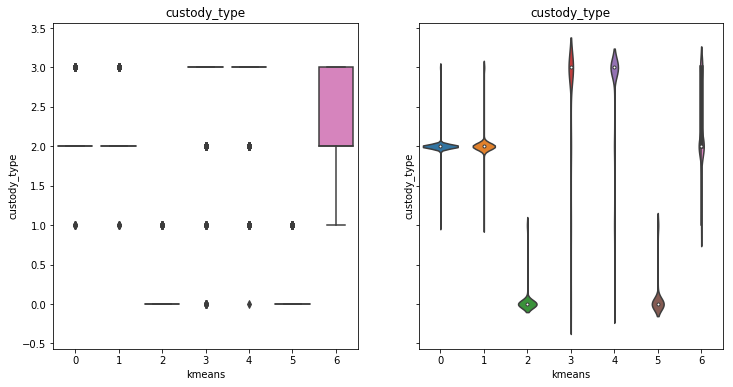

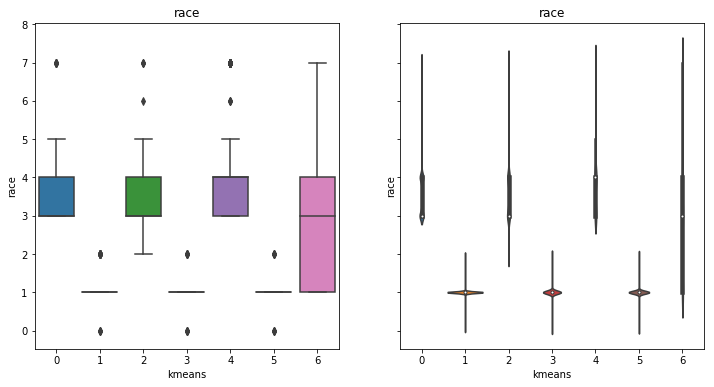

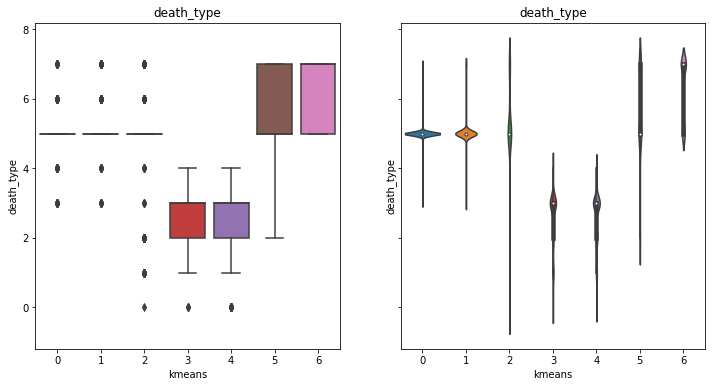

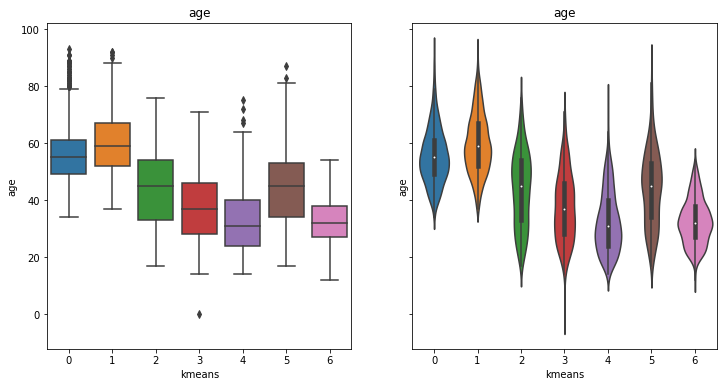

In [12]:
# for each input variable in "Custody" df plot a boxplot and violin plot to get a feel for how distributions differ by cluster
for var in cust.columns[0:4]:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
    ax1.set_title(var)
    ax2.set_title(var)
    sns.boxplot(x="kmeans", y=var, data=cust, ax=ax1)
    sns.violinplot(x="kmeans", y=var, data=cust, ax=ax2)

# Plots of "Officer Involved Shootings" Clusters

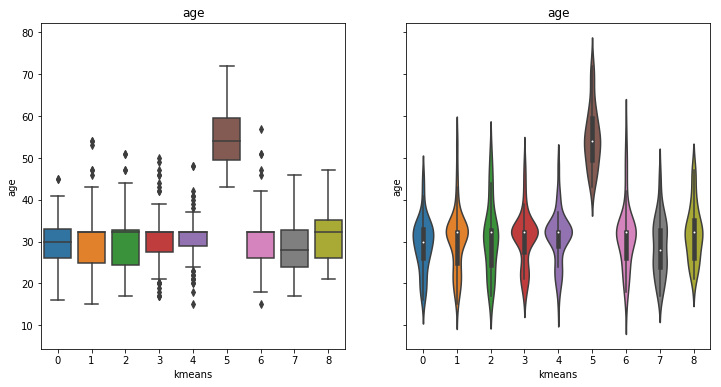

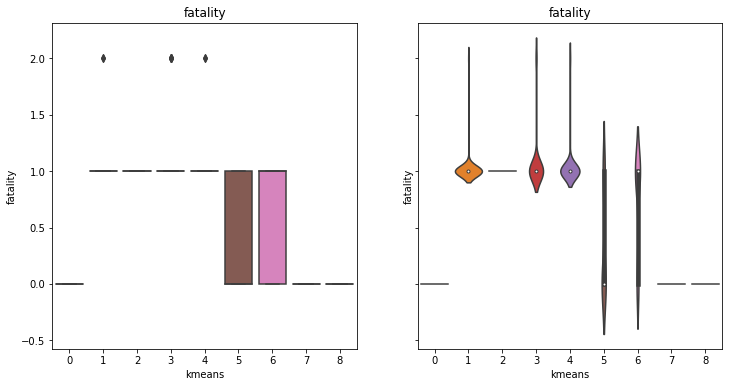

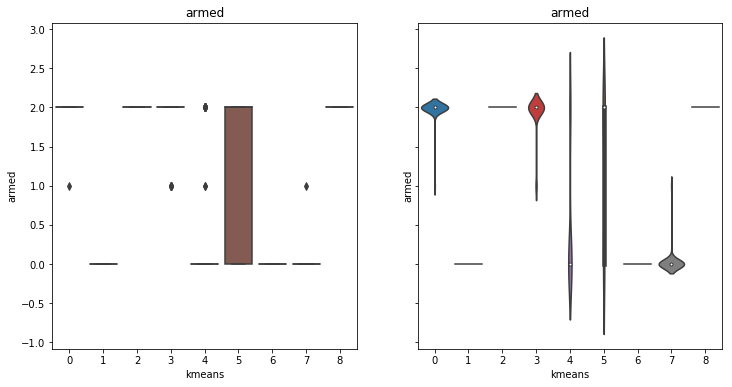

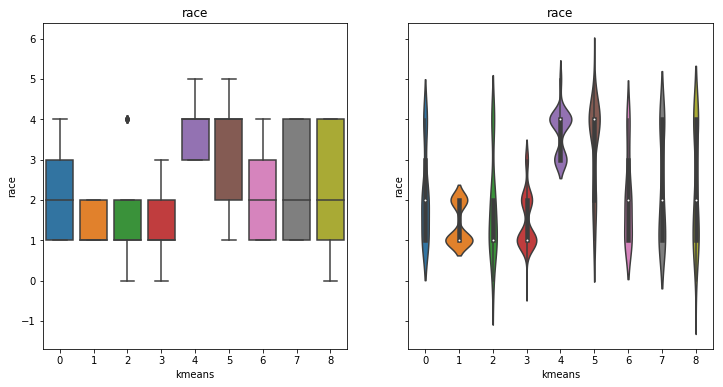

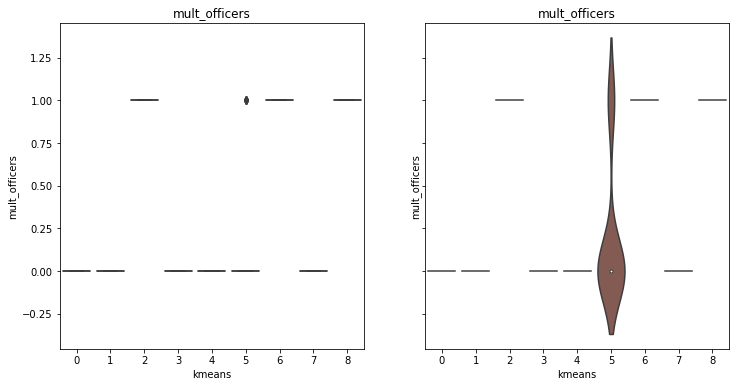

In [13]:
# for each input variable in "Shooting" df plot a boxplot and violin plot to get a feel for how distributions differ by cluster
for var in shoot.columns[0:5]:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
    ax1.set_title(var)
    ax2.set_title(var)
    sns.boxplot(x="kmeans", y=var, data=shoot, ax=ax1)
    sns.violinplot(x="kmeans", y=var, data=shoot, ax=ax2)